### Class distribution for Neisseria meningiditis dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nm = pd.read_csv('/Users/alexandra/Desktop/thesis_programming/final_NM.csv')

In [5]:
nm.shape

(269, 172605)

In [9]:
nm.filter(like='SNP_').shape


(269, 168861)

In [3]:
# Separate feature columns and target labels
X = nm.drop(columns=['CIP',"AZM","TET","sample_ID", 'ST'], errors='ignore')

# Create individual datasets per antibiotic
# Split into features and labels
nm_cip = X.copy()
nm_cip['label'] = nm['CIP']
y_cip = nm_cip['label']

nm_tet = X.copy()
nm_tet['label'] = nm['TET']
y_tet = nm_tet['label']

nm_azm = X.copy()
nm_azm['label'] = nm['AZM']
y_azm = nm_azm['label']

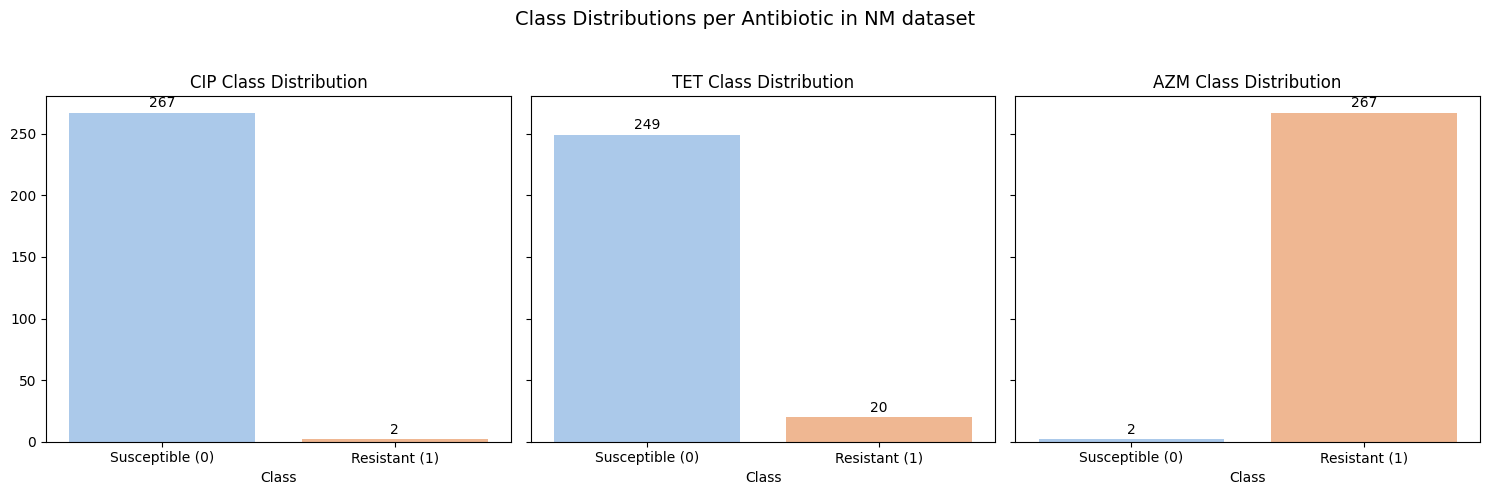

In [4]:
# Store your labels in a dictionary
labels_dict = {
    'CIP': y_cip,
    'TET': y_tet,
    'AZM': y_azm
}

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot each antibiotic
for ax, (name, y) in zip(axes, labels_dict.items()):
    sns.countplot(x=y, palette='pastel', ax=ax, hue=y)
    ax.set_title(f"{name} Class Distribution", fontsize=12)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count" if name == 'AMG' else "")  # Only show y-axis on first
    ax.set_xticks([0, 1], ['Susceptible (0)', 'Resistant (1)'])
    ax.get_legend().remove()

    # Annotate counts
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count + 2),
                        ha='center', va='bottom', fontsize=10)


# Overall plot formatting
plt.suptitle("Class Distributions per Antibiotic in NM dataset", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()
